In [1]:
train = pd.read_csv('./input/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
test = pd.read_csv('./input/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 相关系数矩阵

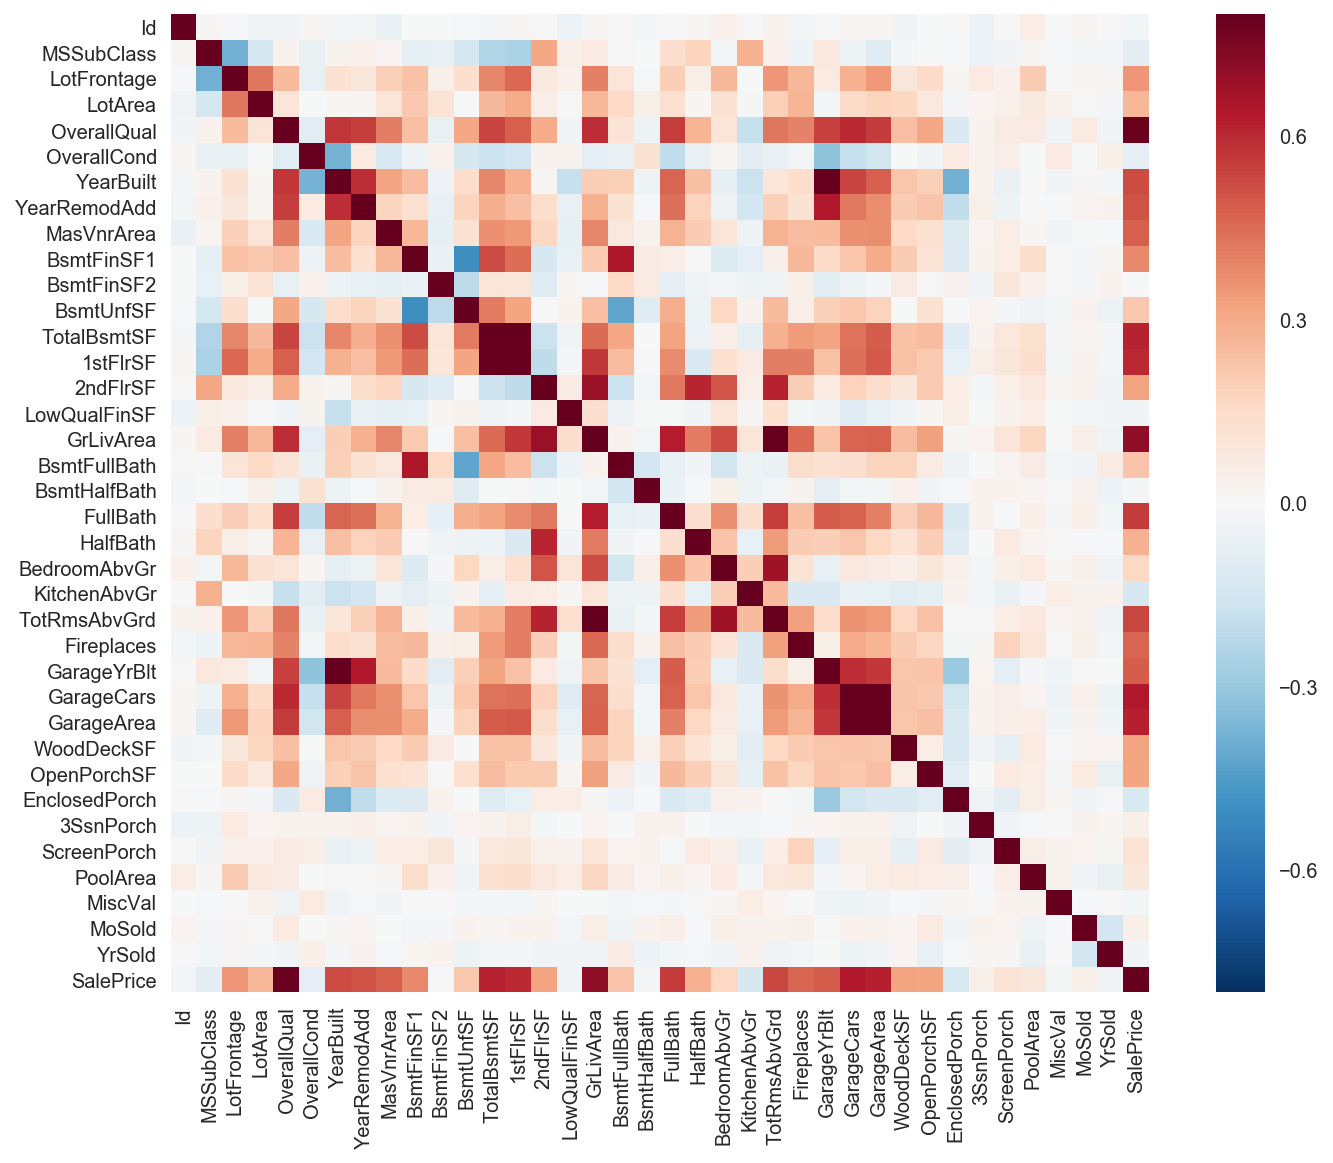

In [4]:
# 通过 Correlation matrix 观察哪些变量会和预测目标关系比较大，哪些变量之间会有较强的关联
import seaborn as sns

corr_mat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8, square=True)
plt.show()

In [5]:
# 看与价格最线性相关的特征有哪些
corr_mat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [6]:
corr_mat['SalePrice'].sort_values(ascending=False)[:9]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

把与结果最相关的 8 个变量打印出来

In [7]:
k = 5
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
np.corrcoef(train[cols].values.T)

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ]])

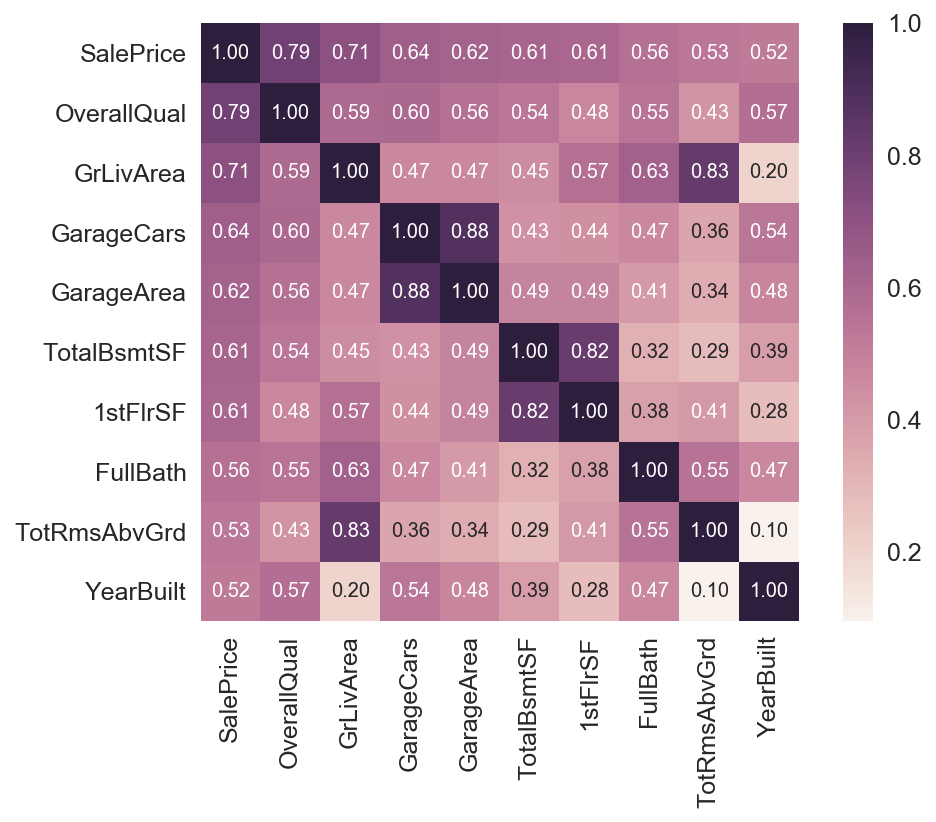

In [8]:
k = 10 # number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
# annot_kws={'size': 10} 设置注释的字体大小
# cbar= True 显示右侧的标注
# annot=True 是否在方框内显示相关系数
# square=True 如果为 True, 则将坐标轴方向设置为 "相等", 以便每个单元格显示成正方形。
hm = sns.heatmap(cm, cbar= True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 统计缺失值和缺失值占比

In [10]:
total = train.isnull().sum().sort_values(ascending=False)
total / len(train)

percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)

missing_data =  pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [11]:
drop_columns = missing_data[missing_data['Total'] > 1].index
# 删除列，设置 axis = 1
train_rm_columns = train.drop(labels=drop_columns, axis=1)
# 如果不设置，axis = 0 ，即默认删除的是某一行
train_rm_one_record = train_rm_columns.drop(
    train[train['Electrical'].isnull()].index)

In [14]:
train_rm_one_record.shape

(1459, 63)

In [15]:
train_rm_one_record

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


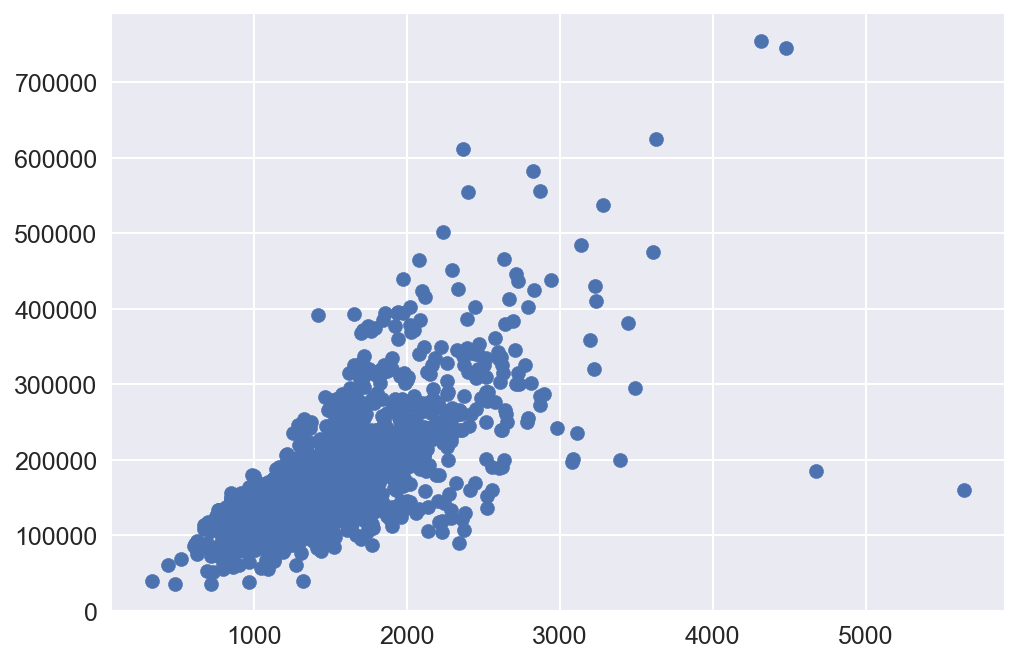

In [29]:
# 注意：这里一定要设置 axis=1
GrLivArea_SalePrice = pd.concat(
    [train_rm_one_record['GrLivArea'], train_rm_one_record['SalePrice']], axis=1, ignore_index=False)

# 以上（地面）生活区平方英尺
plt.scatter(train_rm_one_record['GrLivArea'], train_rm_one_record['SalePrice'])
plt.show()

In [61]:
train_rm_one_record[train_rm_one_record['GrLivArea'] > 5000]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [70]:
outlier = train_rm_one_record[(train_rm_one_record['GrLivArea'] > 4000) & (train_rm_one_record['SalePrice'] < 300000)]

In [80]:
len(train_rm_one_record)

1459

In [82]:
train_rm_outlier =  train_rm_one_record.drop(outlier.index)

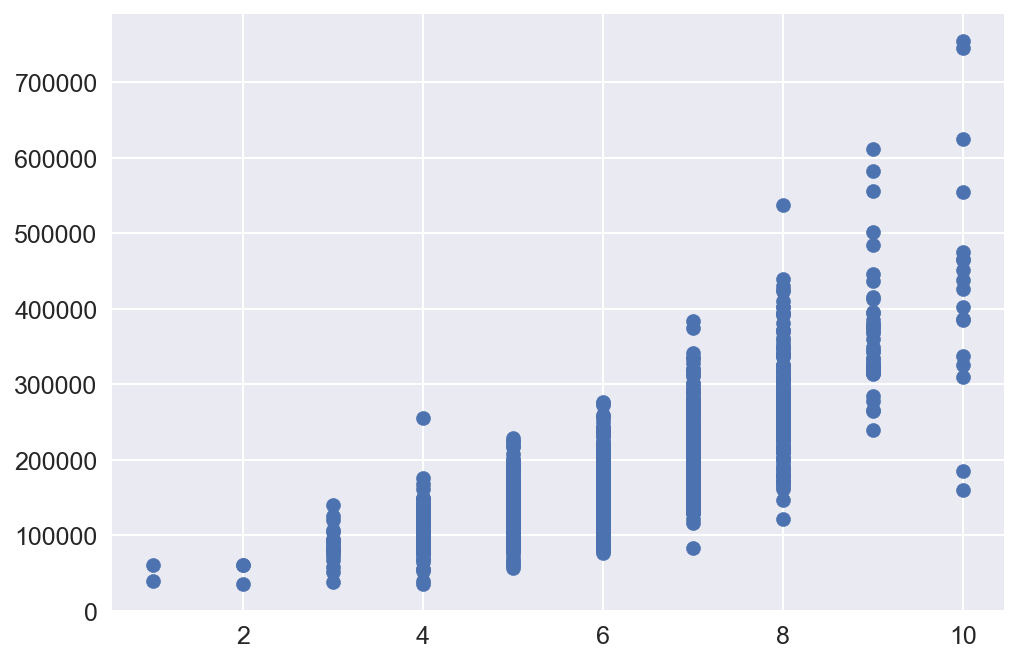

In [30]:
# 离散型变量：整体材料和成品质量
plt.scatter(train_rm_one_record['OverallQual'],
            train_rm_one_record['SalePrice'])
plt.show()

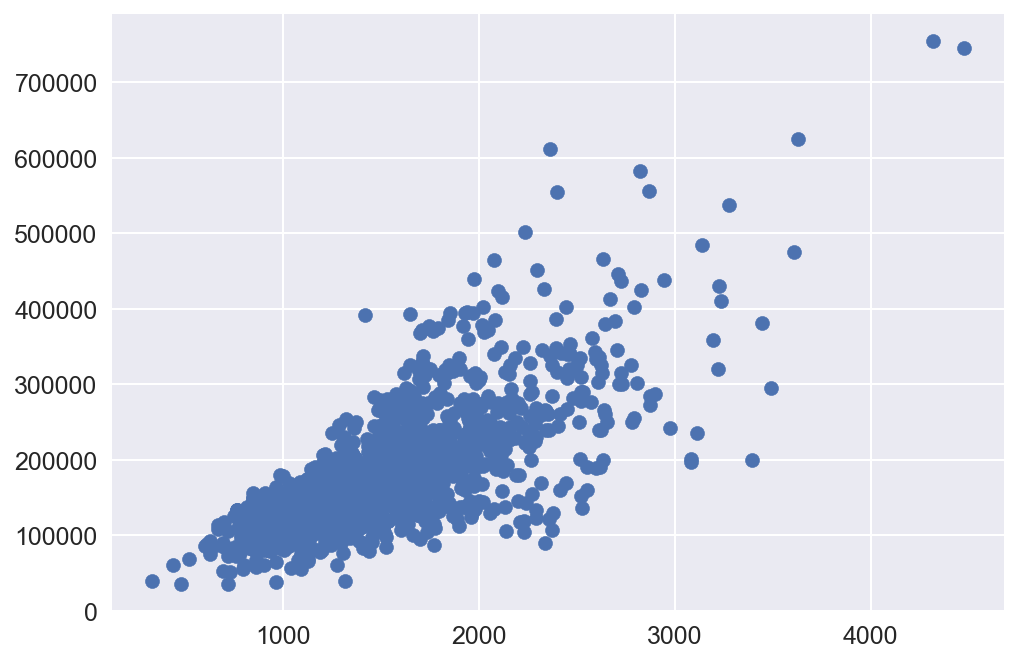

In [85]:
# 以上（地面）生活区平方英尺
plt.scatter(train_rm_outlier['GrLivArea'], train_rm_outlier['SalePrice'])
plt.show()

In [90]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)

In [93]:
data.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(-0.5, 9.5, 0, 800000)

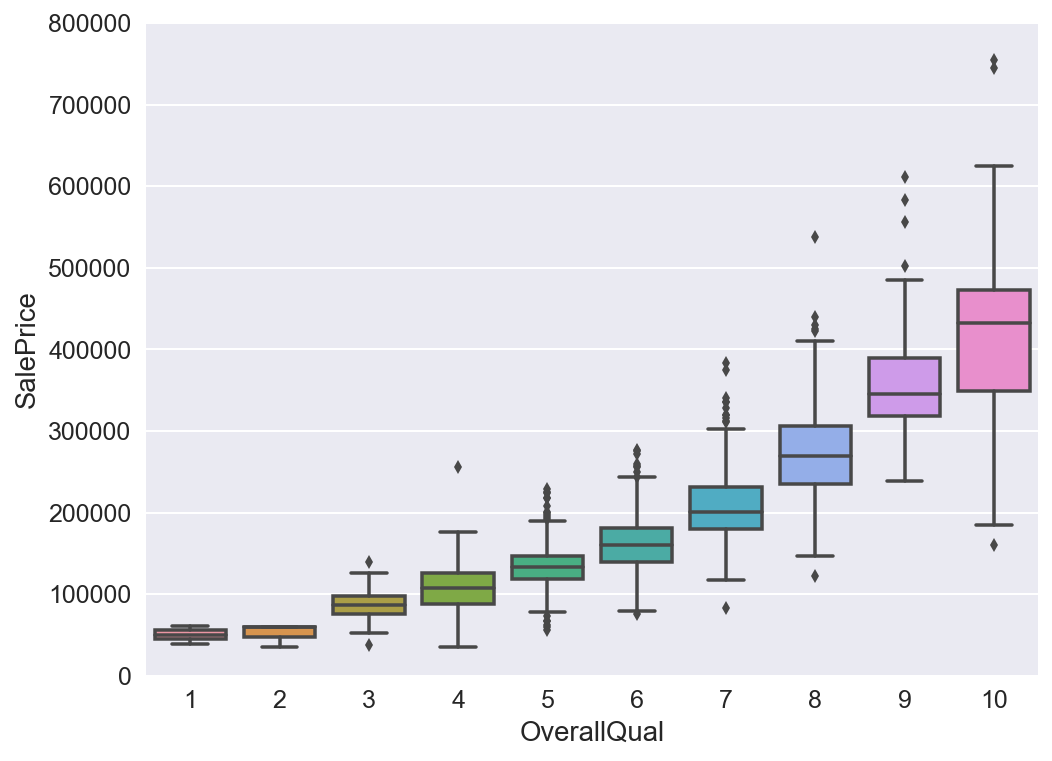

In [89]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

+ 可以看出 SalePrice 与 OverallQual 分布趋势相同。

In [99]:
train_rm_outlier['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
5       1993
6       2004
7       1973
8       1931
9       1939
10      1965
11      2005
12      1962
13      2006
14      1960
15      1929
16      1970
17      1967
18      2004
19      1958
20      2005
21      1930
22      2002
23      1976
24      1968
25      2007
26      1951
27      2007
28      1957
29      1927
        ... 
1430    2005
1431    1976
1432    1927
1433    2000
1434    1977
1435    1962
1436    1971
1437    2008
1438    1957
1439    1979
1440    1922
1441    2004
1442    2008
1443    1916
1444    2004
1445    1966
1446    1962
1447    1995
1448    1910
1449    1970
1450    1974
1451    2008
1452    2005
1453    2006
1454    2004
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1457, dtype: int64

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

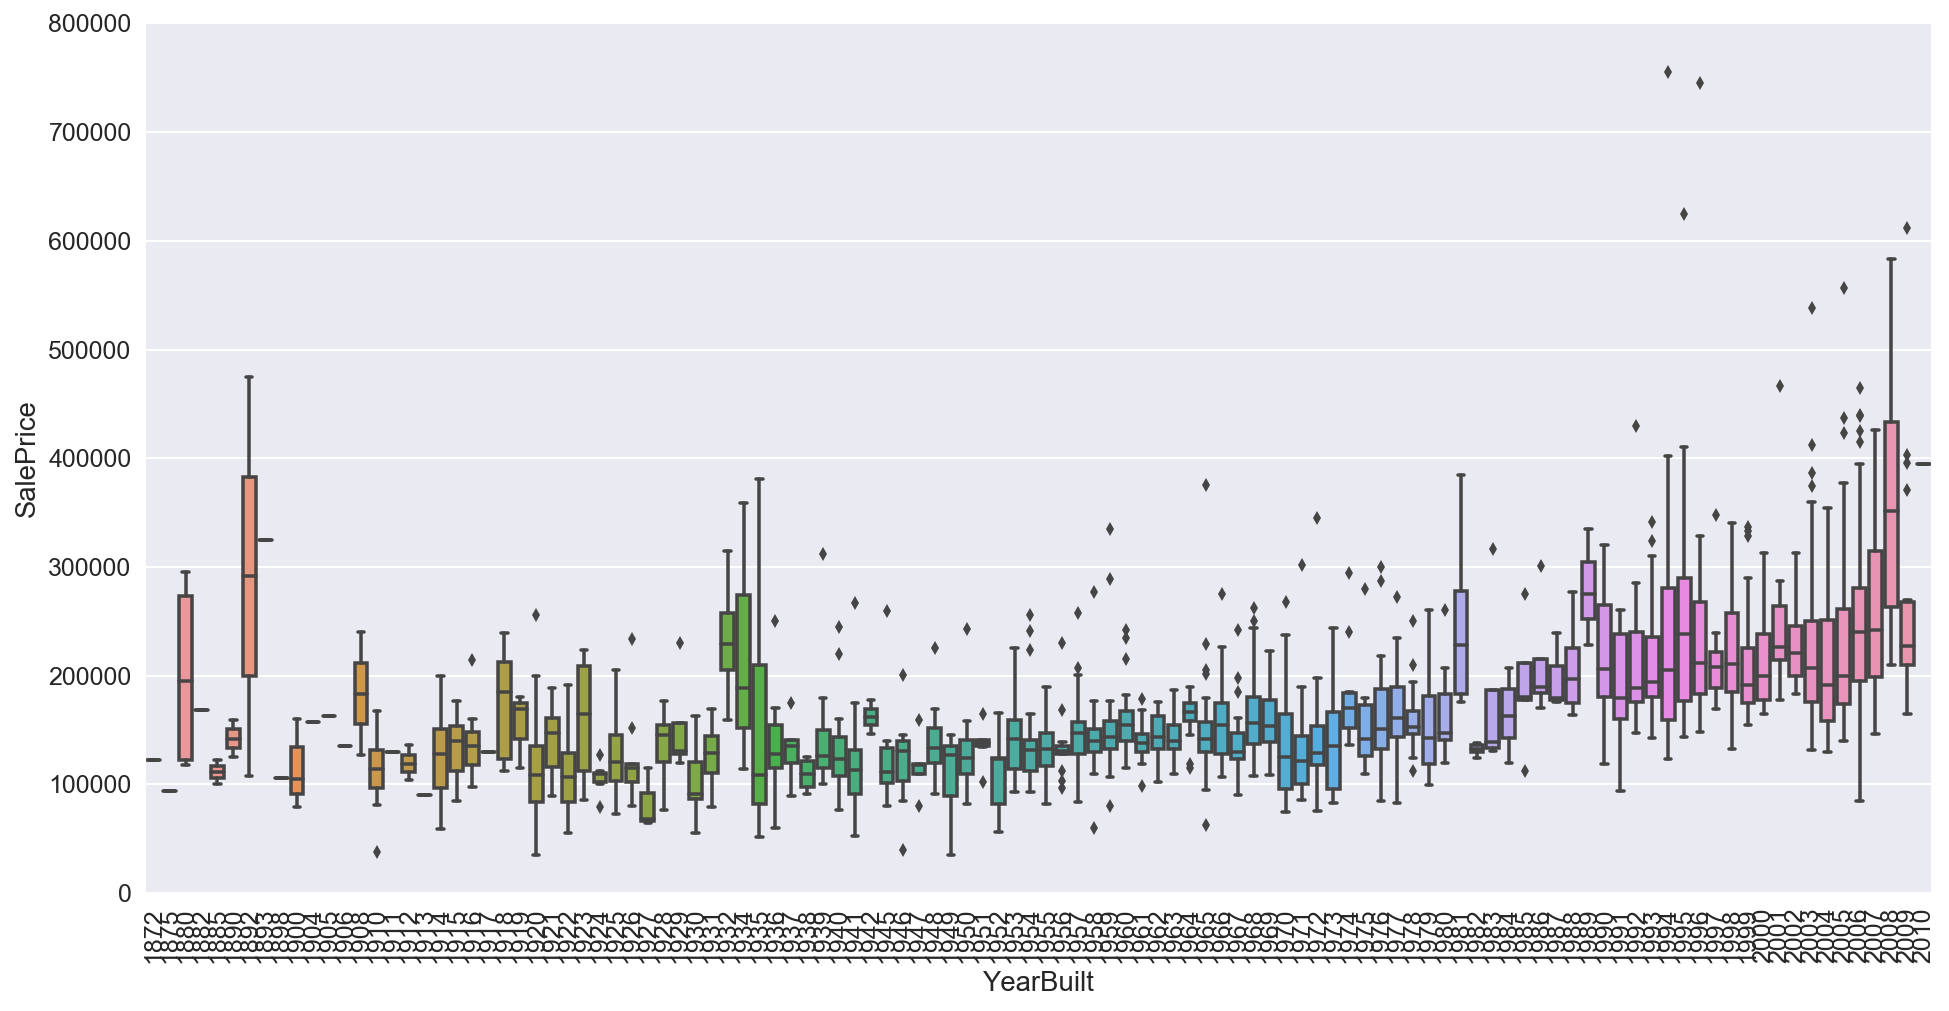

In [101]:
var = 'YearBuilt'
data = pd.concat([train_rm_outlier['SalePrice'], train_rm_outlier[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

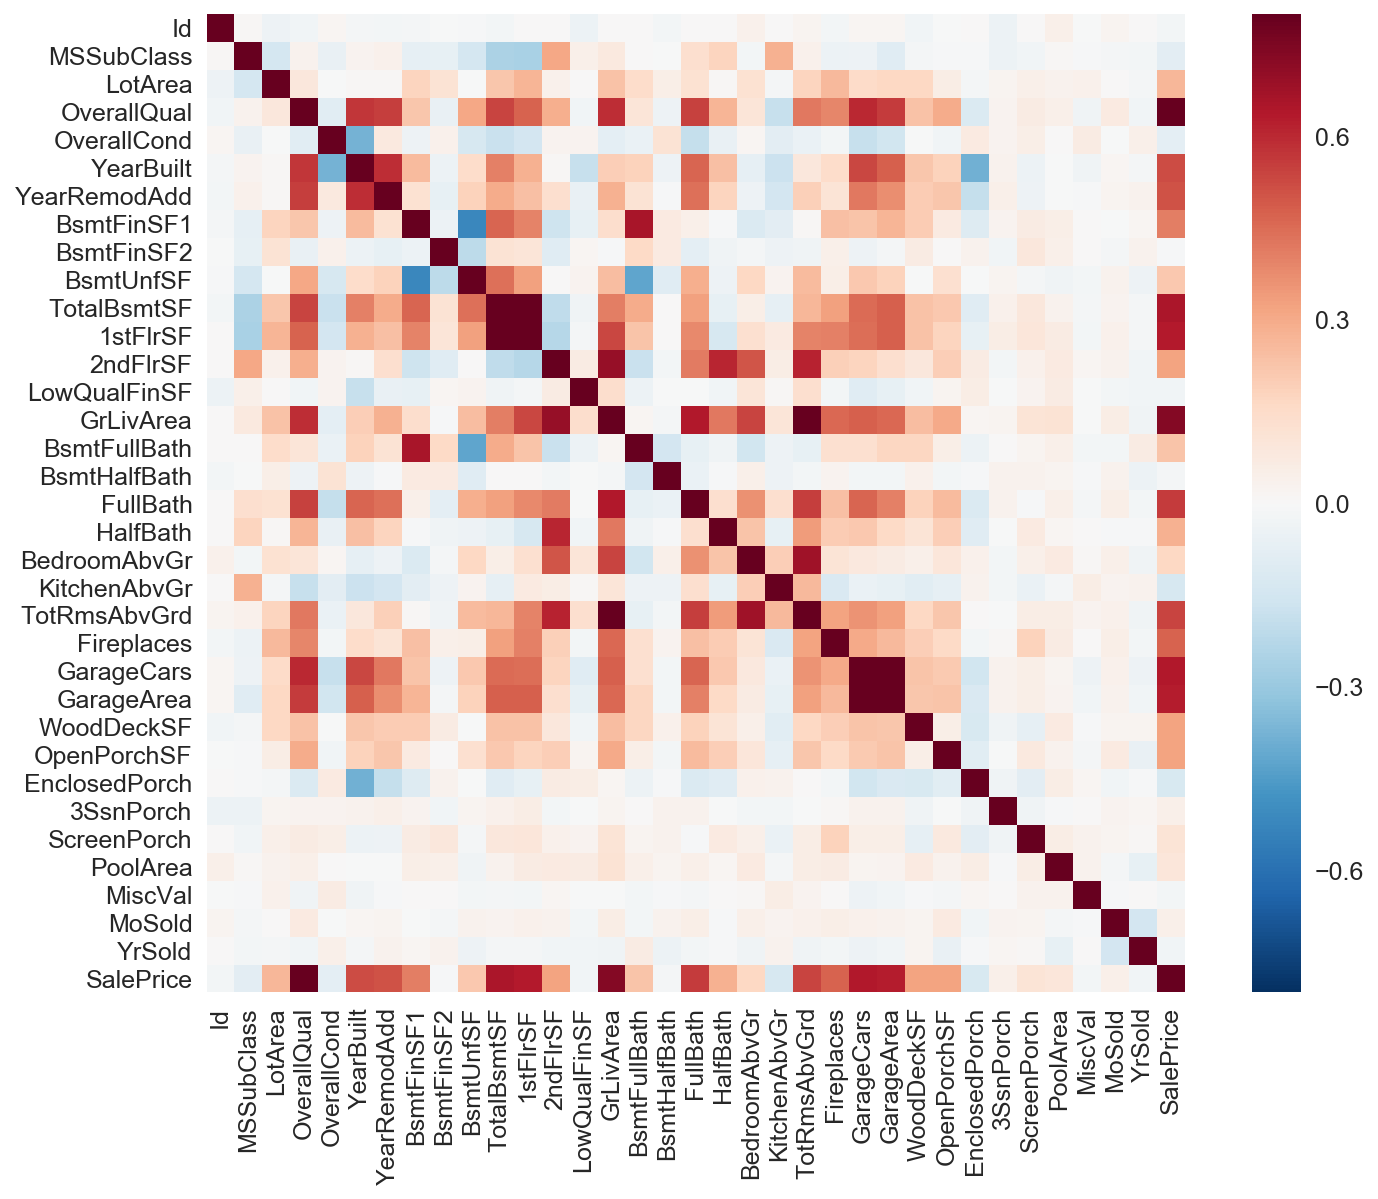

In [102]:
corrmat = train_rm_outlier.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [103]:
corrmat = train_rm_outlier.corr()

In [106]:
corrmat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795863
GrLivArea        0.734962
TotalBsmtSF      0.651553
GarageCars       0.641111
1stFlrSF         0.631667
GarageArea       0.629209
FullBath         0.562384
TotRmsAbvGrd     0.537826
YearBuilt        0.523986
YearRemodAdd     0.508047
Fireplaces       0.469903
BsmtFinSF1       0.409415
WoodDeckSF       0.324767
OpenPorchSF      0.321119
2ndFlrSF         0.320663
HalfBath         0.284884
LotArea          0.268174
BsmtFullBath     0.228419
BsmtUnfSF        0.214427
BedroomAbvGr     0.168267
ScreenPorch      0.111388
PoolArea         0.099484
MoSold           0.046071
3SsnPorch        0.044555
BsmtFinSF2      -0.011456
BsmtHalfBath    -0.016909
MiscVal         -0.021214
Id              -0.021512
LowQualFinSF    -0.025639
YrSold          -0.028866
OverallCond     -0.078016
MSSubClass      -0.084222
EnclosedPorch   -0.128694
KitchenAbvGr    -0.135974
Name: SalePrice, dtype: float64

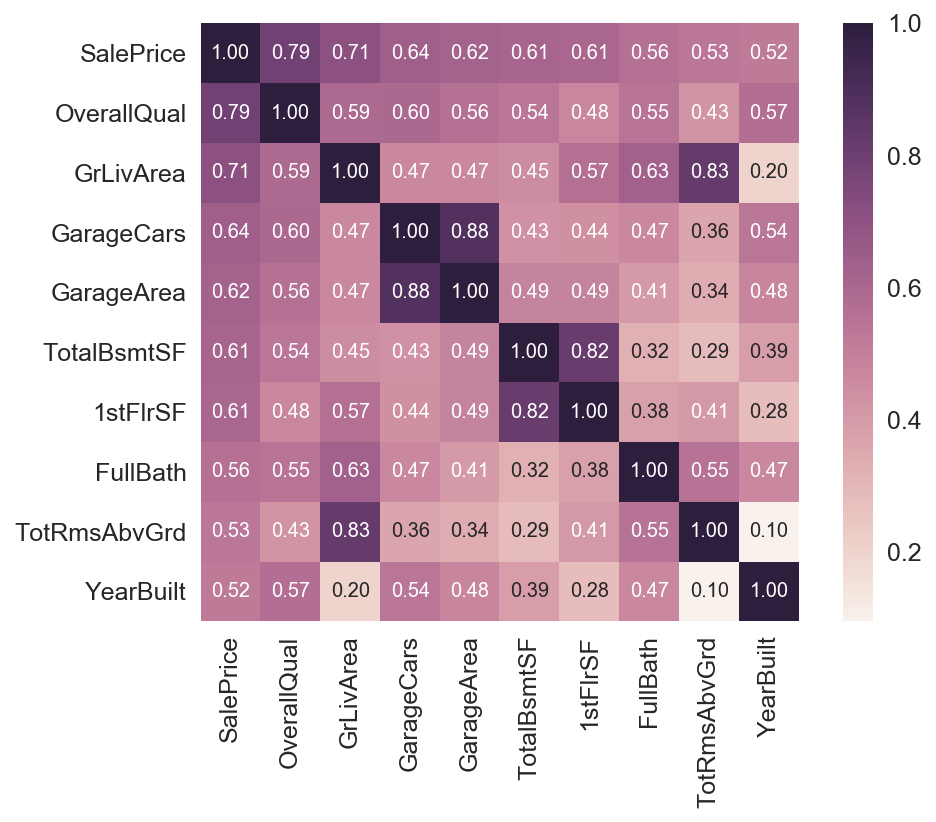

In [116]:
k = 10

cols = corr_mat.nlargest(k,'SalePrice')['SalePrice'].index
np.corrcoef(train_rm_outlier[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

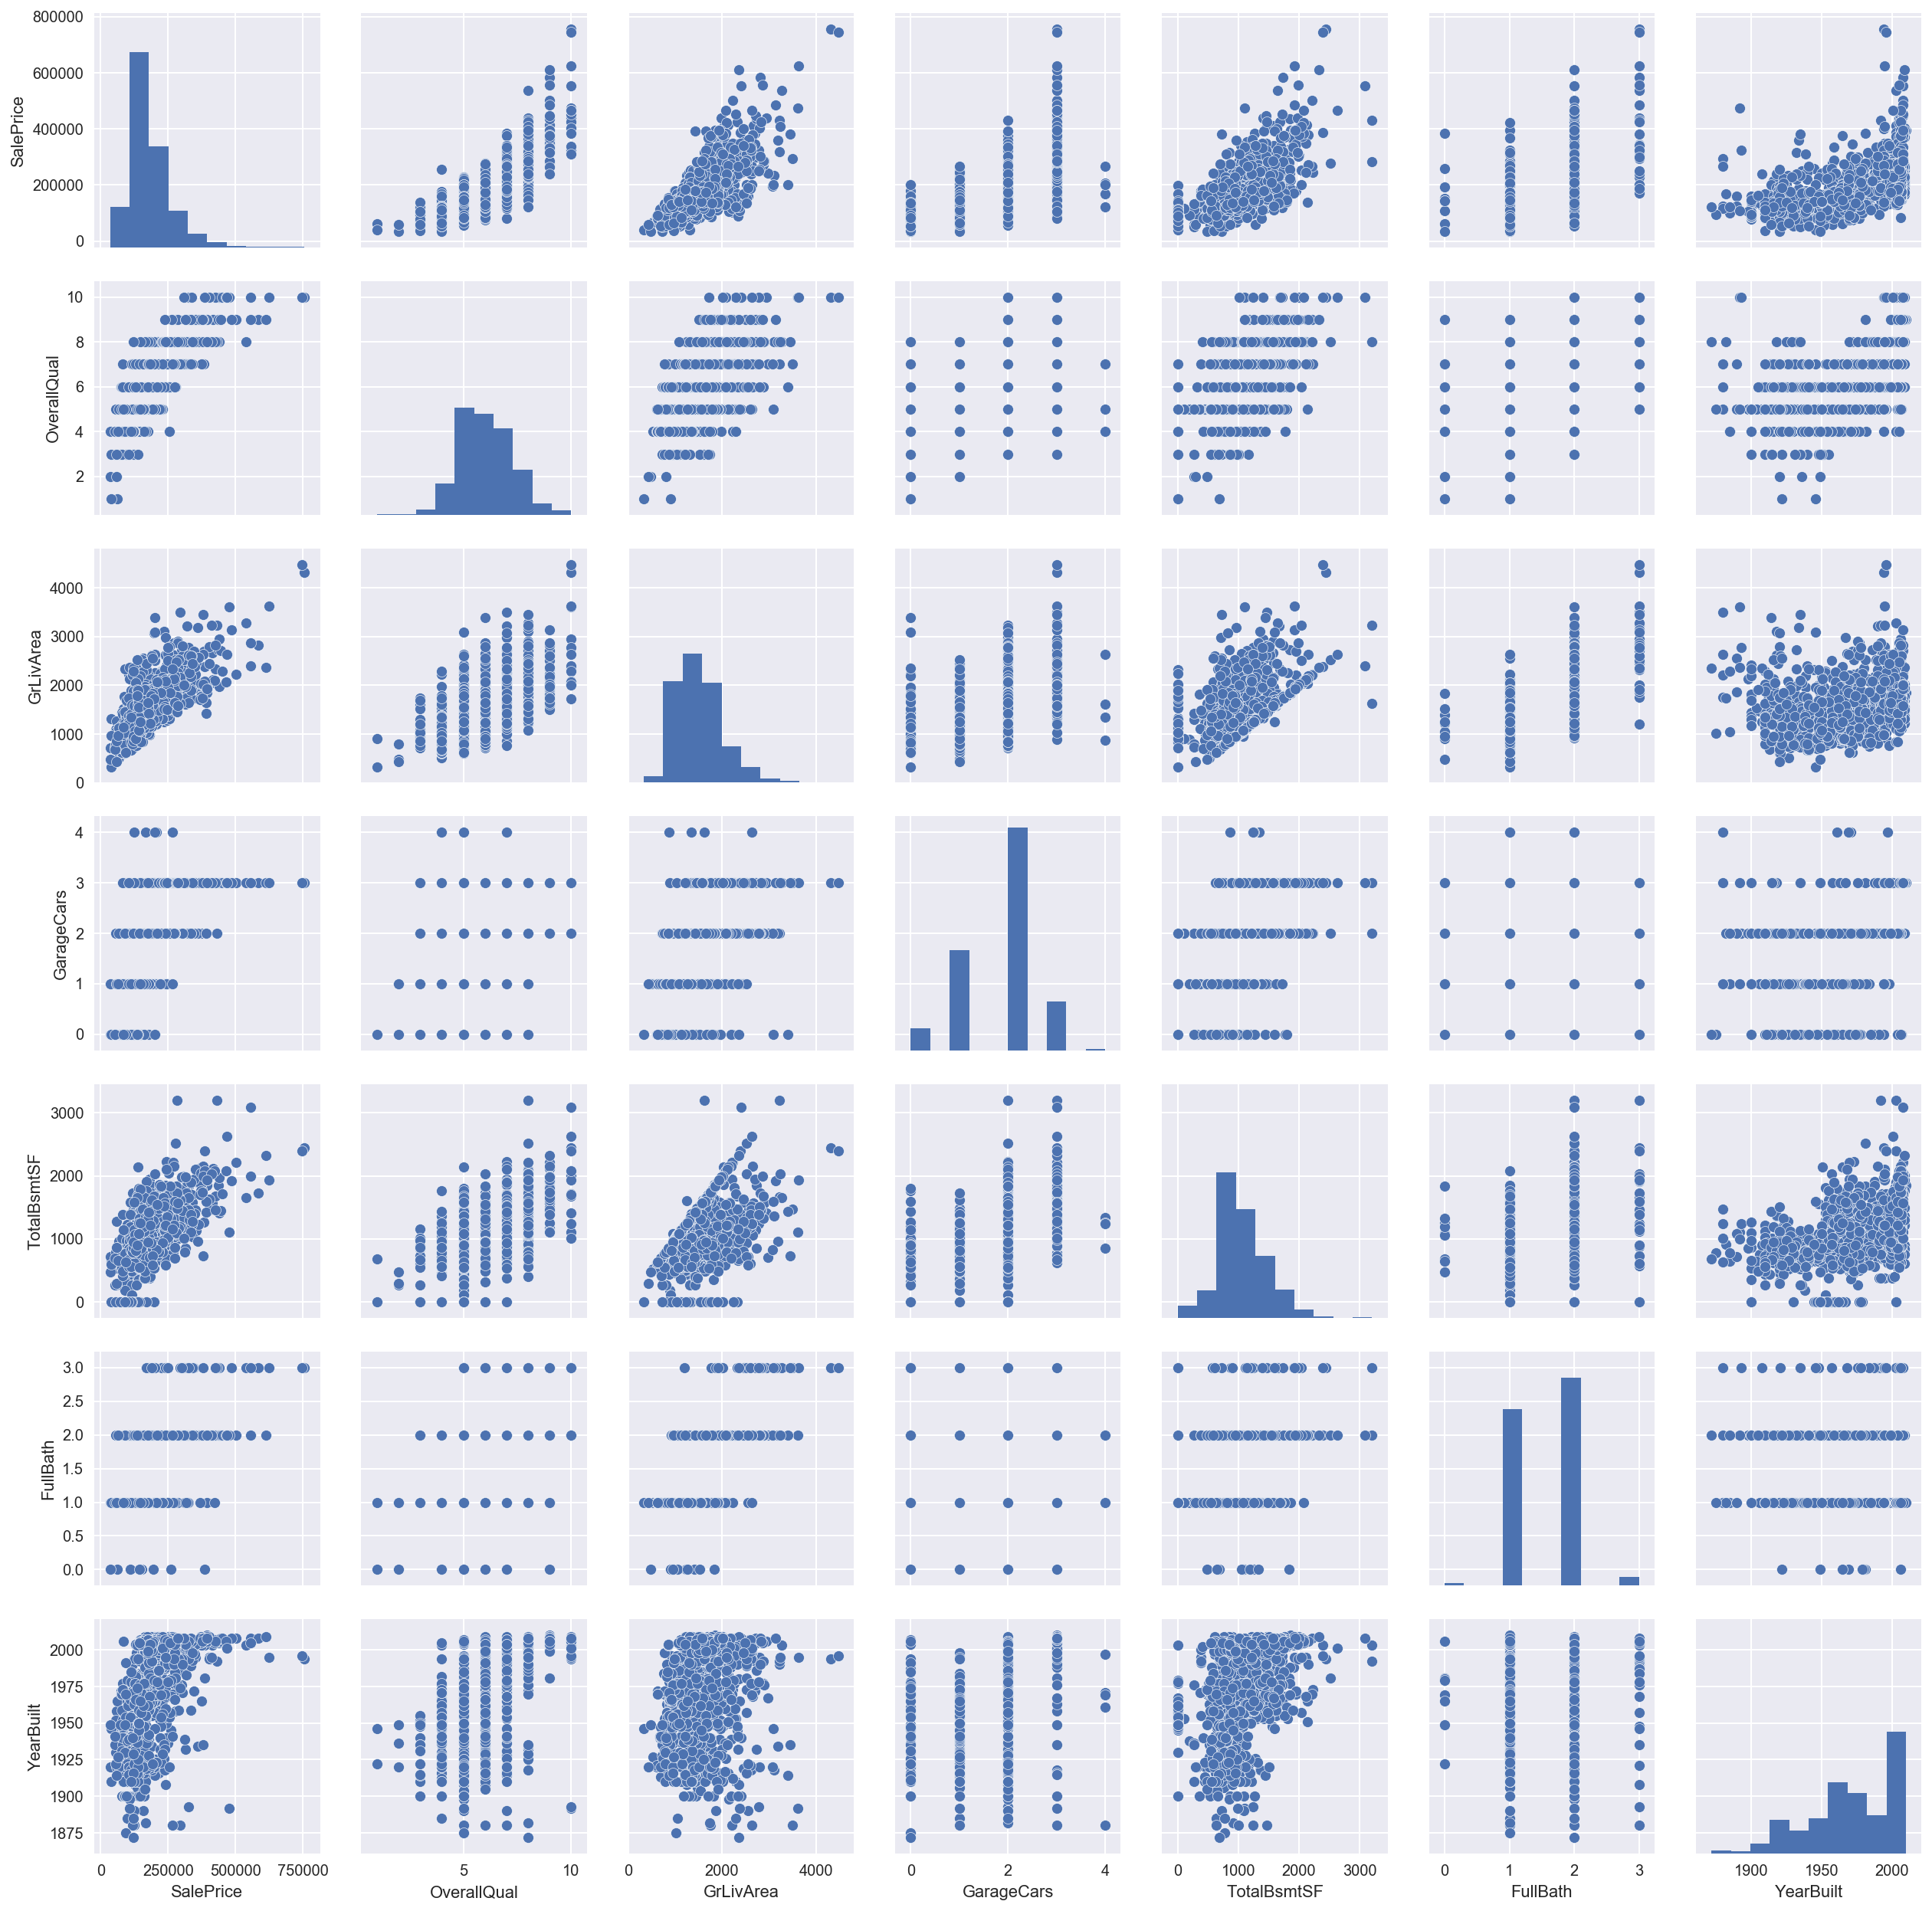

In [118]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_rm_outlier[cols], size = 2.5)
plt.show();

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'stats' is not defined

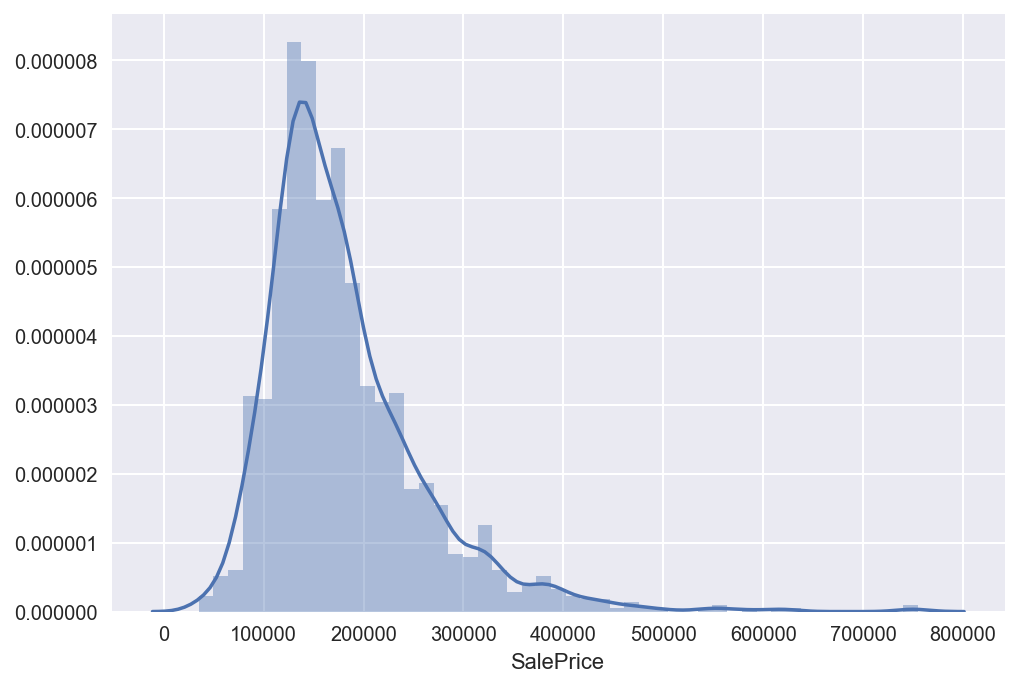